# Maximum Pooling

## Condense with Maximum Pooling

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    layers.MaxPool2D(pool_size=2)
    # More layers follow
])

A MaxPool2D layer is much like a Conv2D layer, except that it uses a simple maximum function instead of a kernel, with the pool_size parameter analogous to kernel_size. A MaxPool2D layer doesn't have any trainable weights like a convolutional layer does in its kernel, however.
Let's take another look at the extraction figure from the last lesson. Remember that MaxPool2D is the Condense step.
Notice that after applying the ReLU function (Detect) the feature map ends up with a lot of "dead space," that is, large areas containing only 0's (the black areas in the image). Having to carry these 0 activations through the entire network would increase the size of the model without adding much useful information. Instead, we would like to condense the feature map to retain only the most useful part -- the feature itself.

This in fact is what maximum pooling does. Max pooling takes a patch of activations in the original feature map and replaces them with the maximum activation in that patch.

When applied after the ReLU activation, it has the effect of "intensifying" features. The pooling step increases the proportion of active pixels to zero pixels.

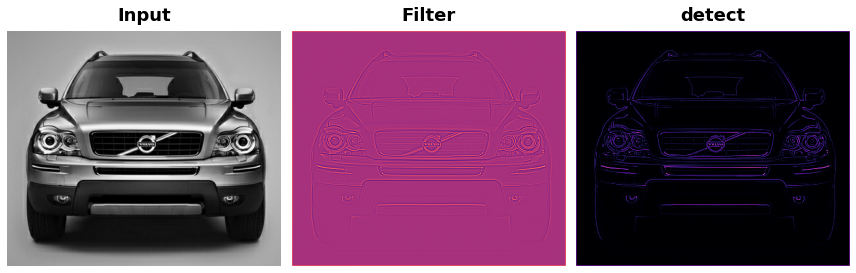

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight='bold',
       labelsize='large',
       titleweight='bold',
       titlesize=18,
       titlepad=10
      )
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean output cells

# Read Image
image_path = "computer-vision-resources/car_feature.jpg"
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

# Define kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=tf.float32)

# Reformat for batch compatibility
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

# Filter step
image_filter = tf.nn.conv2d(
    input = image,
    filters = kernel,
    strides = 1,
    padding= 'SAME'
)

# Detect step
image_detect = tf.nn.relu(image_filter)

# Show what we have so far
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('detect')
plt.show()

We'll use another one of the functions in tf.nn to apply the pooling step, tf.nn.pool. This is a Python function that does the same thing as the MaxPool2D layer you use when model building, but, being a simple function, is easier to use directly.

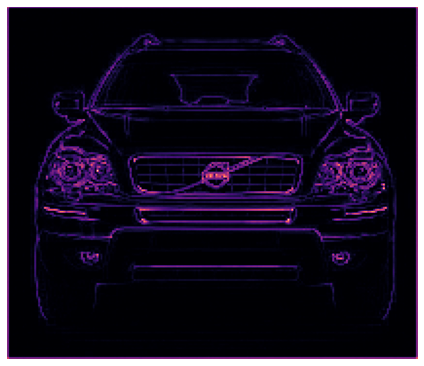

In [3]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape = (2, 2),
    pooling_type='MAX',
    strides = (2, 2),
    padding = 'SAME'
)

plt.figure(figsize = (6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show()

Pretty cool! Hopefully you can see how the pooling step was able to intensify the feature by condensing the image around the most active pixels.

## Translation Invariance

We called the zero-pixels "unimportant". Does this mean they carry no information at all? In fact, the zero-pixels carry positional information. The blank space still positions the feature within the image. When MaxPool2D removes some of these pixels, it removes some of the positional information in the feature map. This gives a convnet a property called translation invariance. This means that a convnet with maximum pooling will tend not to distinguish features by their location in the image. ("Translation" is the mathematical word for changing the position of something without rotating it or changing its shape or size.)

Since the network can no longer distinguish between them in the feature maps, it can't distinguish them in the original image either: it has become invariant to that difference in position.

In fact, pooling only creates translation invariance in a network over small distances, as with the two dots in the image. Features that begin far apart will remain distinct after pooling; only some of the positional information was lost, but not all of it.

This invariance to small differences in the positions of features is a nice property for an image classifier to have. Just because of differences in perspective or framing, the same kind of feature might be positioned in various parts of the original image, but we would still like for the classifier to recognize that they are the same. Because this invariance is built into the network, we can get away with using much less data for training: we no longer have to teach it to ignore that difference. This gives convolutional networks a big efficiency advantage over a network with only dense layers.

## Conclusion 
In this lesson, we learned the about the last step of feature extraction: condense with MaxPool2D. In Lesson 4, we'll finish up our discussion of convolution and pooling with sliding windows.